<a href="https://colab.research.google.com/github/codewithsheikh/Blockchain-Transaction-and-Market-Analysis/blob/main/Blockchain_Transaction_and_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Blockchain Transaction and Market Analysis**

### **Introduction**
In this project, we will analyze and visualize transaction data from the Ethereum, Bitcoin, and Solana blockchains. Additionally, we will examine historical market data and predict future prices using advanced forecasting techniques.

### Setup and Installation
Installing and importing the required libraries and connecting to blockchain nodes for Ethereum, Bitcoin, and Solana.

In [3]:
pip install pandas numpy requests web3 bitcoinrpc python-binance yfinance prophet matplotlib seaborn jupyter python-bitcoinrpc


### Ethereum Blockchain Transaction Data Extraction

In [4]:
from web3 import Web3
import pandas as pd
from decimal import Decimal

# Connect to Ethereum node
infura_url = 'https://mainnet.infura.io/v3/50171e2625fa4cc881f98373d6617763'
web3 = Web3(Web3.HTTPProvider(infura_url))

# Check connection
print(web3.is_connected())

# Fetch transactions in a block range
def fetch_eth_transactions(block_start, block_end):
    transactions = []
    for block_number in range(block_start, block_end):
        block = web3.eth.get_block(block_number, full_transactions=True)
        for tx in block.transactions:
            tx_details = {
                'block_number': tx['blockNumber'],
                'from': tx['from'],
                'to': tx['to'],
                'value': Decimal(tx['value']) / Decimal(1e18),  # Convert from Wei to Ether
                'gas': tx['gas'],
                'gas_price': Decimal(tx['gasPrice']) / Decimal(1e9)  # Convert from Wei to Gwei
            }
            transactions.append(tx_details)
    return pd.DataFrame(transactions)

# Example: Fetch transactions from block 13000000 to 13000100
eth_transactions = fetch_eth_transactions(13000000, 13000100)
eth_transactions.head()


True


,block_number,from,to,value,gas,gas_price
0,13000000,0xC098B2a3Aa256D2140208C3de6543aAEf5cd3A94,0xFC6ce082cB079eca92Bc850D64cF66799f347778,0.00386003,63000,68.9
1,13000000,0x65743eEb652Ec732E516d526F4163694B833b935,0x7BEF710a5759d197EC0Bf621c3Df802C2D60D848,0,50000,65
2,13000000,0xDBF07B87A67D0e978A3706FD0D4D6b0eBc78c8D4,0x1D36d59e5a22cB51B30Bb6fA73b62D73f4A11745,0,200000,60.5
3,13000000,0xAc8C96600E469113C791F45f05FE12Cfc7D7438e,0x7Be8076f4EA4A4AD08075C2508e481d6C946D12b,0.13,228799,60
4,13000000,0x6A4F8F966C3867B21E98762D5f91E4B29A0FeD53,0x3e27E55fa2E3f32BF573c8C5d8105fE82322D285,0.05,21000,58.260858787


## Bitcoin Blockchain Data Extraction Using Blockstream API

In [7]:
import requests

# Function to get block hash by block height
def get_block_hash(height):
    response = requests.get(f'https://blockstream.info/api/block-height/{height}')
    return response.text

# Function to get block details by block hash
def get_block_details(block_hash):
    response = requests.get(f'https://blockstream.info/api/block/{block_hash}')
    return response.json()

# Example usage:
block_height = 700000
block_hash = get_block_hash(block_height)
block_details = get_block_details(block_hash)

print(f"Block hash for block {block_height}: {block_hash}")
print(f"Block details: {block_details}")


Block hash for block 700000: 0000000000000000000590fc0f3eba193a278534220b2b37e9849e1a770ca959
Block details: {'id': '0000000000000000000590fc0f3eba193a278534220b2b37e9849e1a770ca959', 'height': 700000, 'version': 1073733636, 'timestamp': 1631333672, 'tx_count': 1276, 'size': 1276422, 'weight': 3998094, 'merkle_root': '1f8d213c864bfe9fb0098cecc3165cce407de88413741b0300d56ea0f4ec9c65', 'previousblockhash': '0000000000000000000aa3ce000eb559f4143be419108134e0ce71042fc636eb', 'mediantime': 1631331088, 'nonce': 2881644503, 'bits': 386877668, 'difficulty': 18415156832118.24}


## Exploratory Data Analysis (EDA)

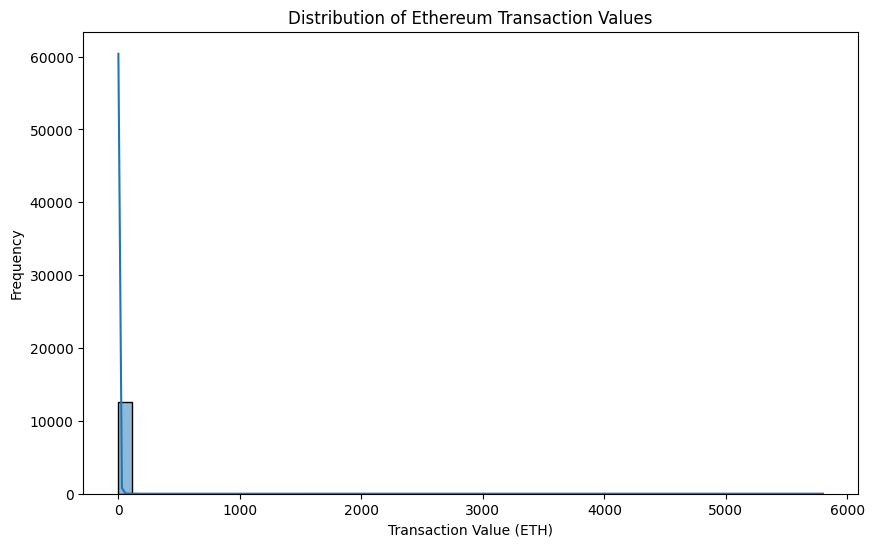

In [10]:
# Display basic statistics for Ethereum transactions
eth_transactions.describe()

# Check for any missing data
eth_transactions.isnull().sum()

# Visualize the distribution of transaction values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(eth_transactions['value'], bins=50, kde=True)
plt.title('Distribution of Ethereum Transaction Values')
plt.xlabel('Transaction Value (ETH)')
plt.ylabel('Frequency')
plt.show()


                                                  id  height     version  \
0  0000000000000000000590fc0f3eba193a278534220b2b...  700000  1073733636   

    timestamp  tx_count     size   weight  \
0  1631333672      1276  1276422  3998094   

                                         merkle_root  \
0  1f8d213c864bfe9fb0098cecc3165cce407de88413741b...   

                                   previousblockhash  mediantime       nonce  \
0  0000000000000000000aa3ce000eb559f4143be4191081...  1631331088  2881644503   

        bits    difficulty  
0  386877668  1.841516e+13  


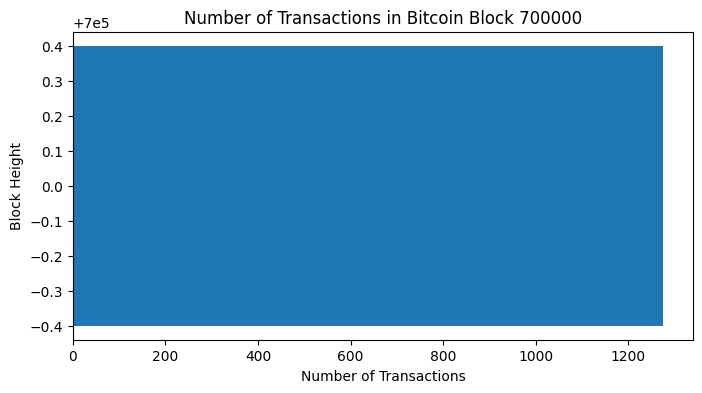

In [11]:
# Convert the block details into a DataFrame
btc_block_df = pd.DataFrame([block_details])

# Display the block details
print(btc_block_df)

# Visualize the transaction count in the block
plt.figure(figsize=(8, 4))
plt.barh(btc_block_df['height'], btc_block_df['tx_count'])
plt.title('Number of Transactions in Bitcoin Block 700000')
plt.xlabel('Number of Transactions')
plt.ylabel('Block Height')
plt.show()


## Cross-Chain Analysis

In [13]:

summary_df = pd.DataFrame({
    'Blockchain': ['Ethereum', 'Bitcoin'],
    'Transactions': [len(eth_transactions), btc_block_df['tx_count'].iloc[0]],
    'Average Value (ETH/BTC)': [eth_transactions['value'].mean(), 'N/A'],  # For demonstration
})

print(summary_df)


  Blockchain  Transactions Average Value (ETH/BTC)
0   Ethereum         12564                1.313437
1    Bitcoin          1276                     N/A


## Predicting Future Prices Using Prophet Package

In [15]:
!pip install prophet


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93or3s0d/o34a3l26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp93or3s0d/w995der7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30122', 'data', 'file=/tmp/tmp93or3s0d/o34a3l26.json', 'init=/tmp/tmp93or3s0d/w995der7.json', 'output', 'file=/tmp/tmp93or3s0d/prophet_modelgx2eqqru/prophet_model-20240831095858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning

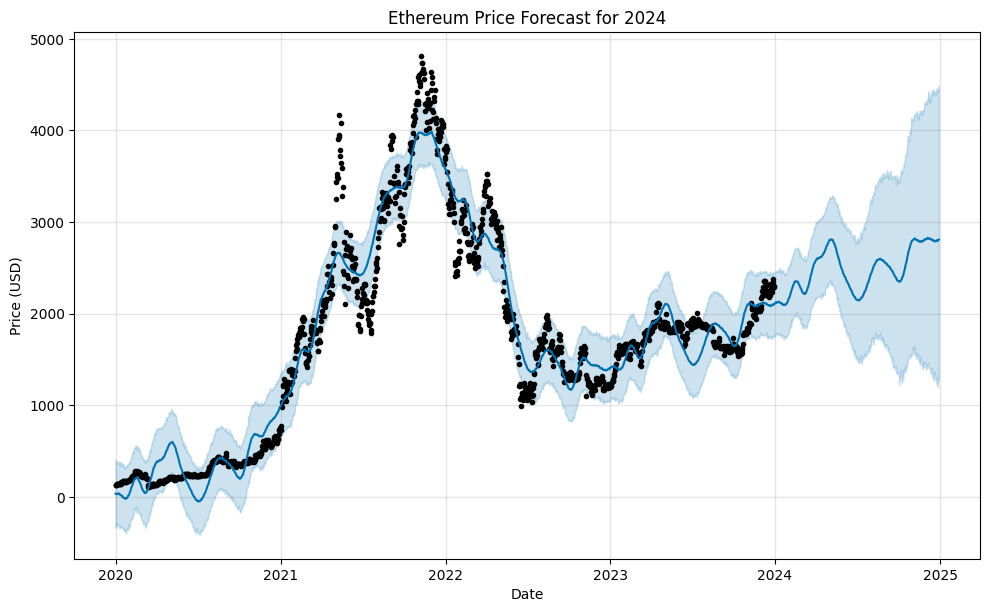

In [16]:
from prophet import Prophet
import yfinance as yf

# Fetch historical price data for Ethereum
eth_price_data = yf.download("ETH-USD", start="2020-01-01", end="2023-12-31")
eth_price_data.reset_index(inplace=True)

# Prepare data for Prophet
eth_price_data = eth_price_data[['Date', 'Close']]
eth_price_data.columns = ['ds', 'y']

# Forecasting with Prophet
model = Prophet()
model.fit(eth_price_data)

# Predict future prices
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Ethereum Price Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


## Exporting Data for Power BI

In [17]:
# Export Ethereum transactions
eth_transactions.to_csv('ethereum_transactions.csv', index=False)

# Export Bitcoin block details
btc_block_df.to_csv('bitcoin_block_700000.csv', index=False)

# Export cross-chain analysis summary
summary_df.to_csv('cross_chain_summary.csv', index=False)


## Conclusion and Insights

Summarizing the key findings, insights, and predictions from the analysis. Discussing the impact and potential applications of the results for investors, auditors, and developers.